In [1]:

# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn import datasets, metrics
import numpy as np
import matplotlib.pyplot as plt

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/fashionmnist/fashion-mnist_test.csv
/kaggle/input/fashionmnist/fashion-mnist_train.csv
/kaggle/input/fashionmnist/train-images-idx3-ubyte
/kaggle/input/fashionmnist/t10k-images-idx3-ubyte
/kaggle/input/fashionmnist/t10k-labels-idx1-ubyte
/kaggle/input/fashionmnist/train-labels-idx1-ubyte


### Dataset
Fashion-MNIST é um conjunto de dados das imagens dos artigos de Zalando - consistindo em um conjunto de treinamento de 60.000 exemplos e um conjunto de testes de 10.000 exemplos. Cada exemplo é uma imagem em escala de cinza de 28 x 28, associada a um rótulo de 10 classes. Zalando pretende que o Fashion-MNIST sirva como substituto direto do conjunto de dados MNIST original para algoritmos de aprendizado de máquina de benchmarking. Ele compartilha o mesmo tamanho de imagem e estrutura de divisões de treinamento e teste.

O conjunto de dados MNIST original contém muitos dígitos manuscritos. Os membros da comunidade de AI / ML / Ciência de dados amam esse conjunto de dados e o usam como referência para validar seus algoritmos. De fato, o MNIST é frequentemente o primeiro grupo de dados que os pesquisadores tentam. "Se não funcionar no MNIST, não funcionará", disseram eles. "Bem, se funcionar no MNIST, ainda poderá falhar nos outros."

Zalando procura substituir o conjunto de dados MNIST original

### Conteúdo
Cada imagem tem 28 pixels de altura e 28 pixels de largura, totalizando 784 pixels no total. Cada pixel tem um único valor de pixel associado, indicando a claridade ou a escuridão desse pixel, com números mais altos significando mais escuros. Esse valor de pixel é um número inteiro entre 0 e 255. Os conjuntos de dados de treinamento e teste possuem 785 colunas. A primeira coluna consiste nos rótulos das classes (veja acima) e representa o artigo de vestuário. O restante das colunas contém os valores de pixel da imagem associada.

Para localizar um pixel na imagem, suponha que decompusemos x como x = i * 28 + j, onde i e j são números inteiros entre 0 e 27. O pixel está localizado na linha i e na coluna j de uma matriz 28 x 28 .
Por exemplo, pixel31 indica o pixel que está na quarta coluna da esquerda e a segunda linha da parte superior, como no diagrama ascii abaixo.

Cada exemplo de treinamento e teste é atribuído a um dos seguintes rótulos:

0 Camiseta / top

1 calça

2 Pulôver

3 Vestido

4 Casaco

5 Sandália

6 Camisa

7 Sapatilha

8 Bag

9 Bota no tornozelo

TL; DR

Cada linha é uma imagem separada.
A coluna 1 é o rótulo da classe.
As colunas restantes são números de pixels (784 no total).
Cada valor é a "escuridão" do pixel (1 a 255)

In [2]:
dataTrain = pd.read_csv('/kaggle/input/fashionmnist/fashion-mnist_train.csv')
dataTrain.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
dataTrain.shape

(60000, 785)

In [4]:
dataTest = pd.read_csv('/kaggle/input/fashionmnist/fashion-mnist_test.csv')
dataTest.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
dataTest.shape

(10000, 785)

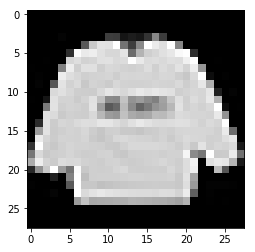

In [6]:
# Imprimindo um objeto do dataset
plt.imshow(dataTrain.values[0][1:].reshape(28,28), cmap='gray', interpolation='none')
plt.show()

# A atividade consiste em utilizar o KNN para classificar as imagens do fmnist

### Separando os dados

In [7]:
X_train, y_train = dataTrain.values[10000: , 1:], dataTrain.values[10000: , 0]
X_val, y_val = dataTrain.values[:10000 , 1:], dataTrain.values[:10000 , 0]
X_test, y_test = dataTest.values[:, 1:], dataTest.values[:, 0]
X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((50000, 784), (50000,), (10000, 784), (10000,), (10000, 784), (10000,))

In [8]:
%%time
kVals = range(1, 10, 2)
accuracies = []
for k in kVals:
    # train the k-Nearest Neighbor classifier with the current value of `k`
    model = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    model.fit(X_train, y_train)
    # evaluate the model and update the accuracies list
    score = model.score(X_val, y_val)
    print("k=%d, accuracy=%.2f%%" % (k, score * 100))
    accuracies.append(score)

k=1, accuracy=84.72%
k=3, accuracy=85.80%
k=5, accuracy=85.79%
k=7, accuracy=85.79%
k=9, accuracy=85.67%
CPU times: user 1h 21min 48s, sys: 2.46 s, total: 1h 21min 50s
Wall time: 1h 21min 49s


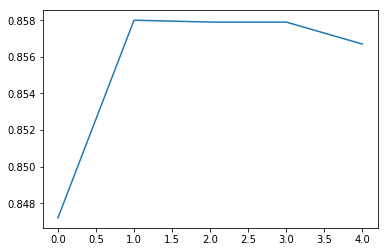

In [9]:
plt.plot(accuracies)

#### Como podemos observar, o k=3 é o melhor número usado para ser o número de visinhos

### Modifique o parâmetro metric do classficiador e avalie outras distâncias métricas disponíveis

In [10]:
models = {}

In [11]:
fmodel = KNeighborsClassifier(n_neighbors=3, metric='euclidean', algorithm='kd_tree')
fmodel.fit(X_train, y_train)
y_pred = fmodel.predict(X_test)
models['euclidean'] = {'Confusion Matrix': metrics.confusion_matrix(y_test, y_pred), 'Accuracy Score': metrics.accuracy_score(y_test, y_pred), 'F1 Score': metrics.f1_score(y_test, y_pred, average='macro'), 'Recall Score': metrics.recall_score(y_test, y_pred, average='macro'), 'Precision Score': metrics.precision_score(y_test, y_pred, average='macro')}

In [12]:
y_test.shape, y_pred.shape

((10000,), (10000,))

In [13]:
models['euclidean']

{'Confusion Matrix': array([[867,   1,  16,  15,   3,   0,  90,   2,   6,   0],
        [  5, 974,   7,   8,   1,   0,   5,   0,   0,   0],
        [ 27,   1, 800,   9,  87,   0,  75,   0,   1,   0],
        [ 45,   7,  18, 876,  27,   0,  27,   0,   0,   0],
        [ 12,   0, 121,  27, 765,   0,  74,   0,   1,   0],
        [  1,   0,   1,   2,   0, 827,   6,  89,   4,  70],
        [207,   1, 120,  17,  59,   0, 590,   0,   6,   0],
        [  0,   0,   0,   0,   0,   5,   0, 941,   0,  54],
        [  5,   0,  13,   3,   4,   0,  11,   7, 954,   3],
        [  0,   0,   0,   0,   0,   2,   0,  32,   0, 966]]),
 'Accuracy Score': 0.856,
 'F1 Score': 0.8555680536745142,
 'Recall Score': 0.8560000000000001,
 'Precision Score': 0.8592946646631049}

In [14]:
fmodel = KNeighborsClassifier(n_neighbors=3, metric='manhattan', algorithm='kd_tree')
fmodel.fit(X_train, y_train)
y_pred = fmodel.predict(X_test)
models['manhattan'] = {'Confusion Matrix': metrics.confusion_matrix(y_test, y_pred), 'Accuracy Score': metrics.accuracy_score(y_test, y_pred), 'F1 Score': metrics.f1_score(y_test, y_pred, average='macro'), 'Recall Score': metrics.recall_score(y_test, y_pred, average='macro'), 'Precision Score': metrics.precision_score(y_test, y_pred, average='macro')}

In [15]:
models['manhattan']

{'Confusion Matrix': array([[874,   1,  18,  15,   1,   0,  85,   2,   4,   0],
        [  7, 969,   5,  12,   2,   0,   5,   0,   0,   0],
        [ 26,   2, 802,   8,  84,   0,  76,   0,   2,   0],
        [ 47,  10,  19, 876,  30,   0,  18,   0,   0,   0],
        [ 10,   1, 138,  29, 755,   0,  66,   0,   1,   0],
        [  0,   0,   0,   0,   1, 886,   0,  70,   2,  41],
        [203,   1, 118,  19,  63,   0, 591,   0,   5,   0],
        [  0,   0,   0,   0,   0,   8,   0, 943,   0,  49],
        [  7,   0,  15,   2,   5,   2,   6,   7, 953,   3],
        [  0,   0,   0,   0,   0,   2,   0,  31,   0, 967]]),
 'Accuracy Score': 0.8616,
 'F1 Score': 0.8610675925205149,
 'Recall Score': 0.8615999999999999,
 'Precision Score': 0.8640107095052671}

In [16]:
fmodel = KNeighborsClassifier(n_neighbors=3, metric='chebyshev', algorithm='kd_tree')
fmodel.fit(X_train, y_train)
y_pred = fmodel.predict(X_test)
models['chebyshev'] = {'Confusion Matrix': metrics.confusion_matrix(y_test, y_pred), 'Accuracy Score': metrics.accuracy_score(y_test, y_pred), 'F1 Score': metrics.f1_score(y_test, y_pred, average='macro'), 'Recall Score': metrics.recall_score(y_test, y_pred, average='macro'), 'Precision Score': metrics.precision_score(y_test, y_pred, average='macro')}

In [17]:
models['chebyshev']

{'Confusion Matrix': array([[826,   5,  64,   3,   2,   0,  93,   2,   5,   0],
        [ 57, 894,  24,  12,   0,   0,  13,   0,   0,   0],
        [ 59,   5, 806,   4,  47,   0,  76,   0,   3,   0],
        [360,   6,  86, 399,  23,   0, 124,   0,   2,   0],
        [ 52,   3, 361,  19, 404,   0, 161,   0,   0,   0],
        [ 34,   1,  57,  25,  13, 293,   8, 218, 216, 135],
        [216,   7, 224,  13,  29,   0, 506,   0,   5,   0],
        [  3,   0,   2,   8,   0,  11,   4, 767, 135,  70],
        [ 65,   2, 148,  13,   4,   3,  42,   4, 718,   1],
        [ 15,   0,  23,   0,   0,   5,  11,  39,  74, 833]]),
 'Accuracy Score': 0.6446,
 'F1 Score': 0.6367031086923232,
 'Recall Score': 0.6446,
 'Precision Score': 0.7078619835585215}

In [18]:
df = pd.DataFrame.from_dict(models).drop(['Confusion Matrix'])

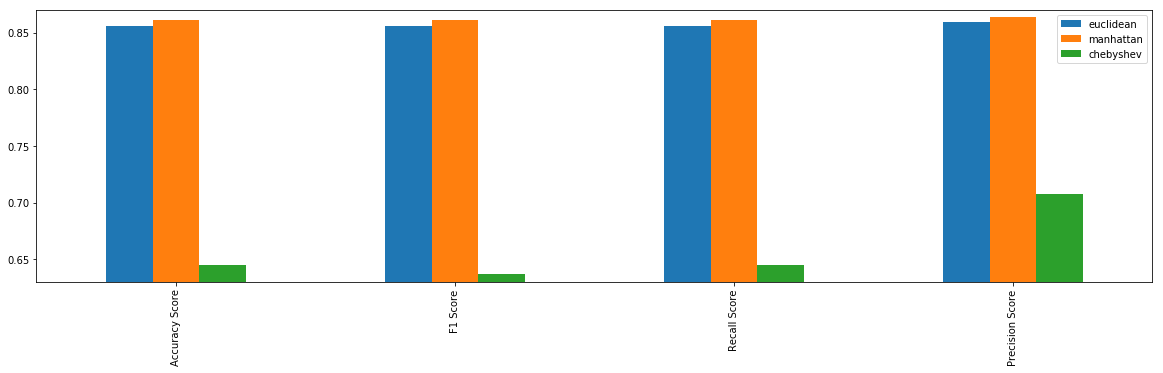

In [19]:
df.plot(kind='bar', ylim=(0.63, 0.87), figsize=(20, 5));